In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
new_data = pd.read_csv("/content/drive/MyDrive/ML_Parkinson_son_dataset.csv")
print(new_data.head())

   Unnamed: 0     f1        f2     f3     f4     f5      f6     f7     f8  \
0           1  0.728  0.000038  0.353  0.376  1.059   5.864  0.642  2.058   
1           2  2.502  0.000123  1.156  1.634  3.469  13.513  1.273  5.263   
2           3  3.509  0.000167  1.715  1.539  5.145   9.112  1.040  3.102   
3           4  2.470  0.000126  1.358  1.341  4.075  10.696  1.256  5.262   
4           5  1.583  0.000082  0.768  0.864  2.303   9.057  1.070  3.794   

      f9  ...      f15      f16     f17      f18      f19    f20    f21  \
0  3.180  ...  195.252  193.289  14.773  159.515  234.505  170.0  169.0   
1  8.771  ...  201.997  203.471  10.853  182.713  220.230   94.0   92.0   
2  4.927  ...  211.887  208.440  11.499  182.821  225.162  117.0  114.0   
3  7.076  ...  195.952  195.222   4.692  186.593  202.812   74.0   73.0   
4  5.158  ...  195.535  192.316   7.512  177.299  200.638   85.0   84.0   

        f22       f23  Class  
0  0.005181  0.000403      1  
1  0.004910  0.000320   

In [4]:
new_data.head(5)

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,Class
0,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,195.252,193.289,14.773,159.515,234.505,170.0,169.0,0.005181,0.000403,1
1,2,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,201.997,203.471,10.853,182.713,220.230,94.0,92.0,0.004910,0.000320,1
2,3,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,211.887,208.440,11.499,182.821,225.162,117.0,114.0,0.004757,0.000380,1
3,4,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,...,195.952,195.222,4.692,186.593,202.812,74.0,73.0,0.005118,0.000187,1
4,5,1.583,0.000082,0.768,0.864,2.303,9.057,1.070,3.794,5.158,...,195.535,192.316,7.512,177.299,200.638,85.0,84.0,0.005199,0.000245,1


In [5]:
new_data.describe

<bound method NDFrame.describe of      Unnamed: 0     f1        f2     f3     f4     f5      f6     f7     f8  \
0             1  0.728  0.000038  0.353  0.376  1.059   5.864  0.642  2.058   
1             2  2.502  0.000123  1.156  1.634  3.469  13.513  1.273  5.263   
2             3  3.509  0.000167  1.715  1.539  5.145   9.112  1.040  3.102   
3             4  2.470  0.000126  1.358  1.341  4.075  10.696  1.256  5.262   
4             5  1.583  0.000082  0.768  0.864  2.303   9.057  1.070  3.794   
..          ...    ...       ...    ...    ...    ...     ...    ...    ...   
722         752  0.464  0.000028  0.261  0.245  0.784   6.708  0.577  3.786   
723         753  0.680  0.000036  0.368  0.305  1.103   2.968  0.326  1.369   
724         754  0.353  0.000019  0.158  0.129  0.474   3.101  0.317  1.554   
725         755  0.175  0.000012  0.072  0.098  0.217   4.265  0.379  2.149   
726         756  0.257  0.000018  0.105  0.122  0.315   5.665  0.544  2.612   

        f9  ...  

In [6]:
train_col=[]
for col in new_data.columns:
    train_col.append(col)
train_col

['Unnamed: 0',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'Class']

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


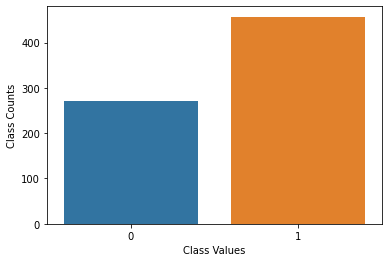

In [7]:
sns.countplot(new_data['Class'].values)
plt.xlabel('Class Values')
plt.ylabel('Class Counts')
plt.show()

In [8]:
index_class=[]
for i in range(100):
    index_class.append(i)

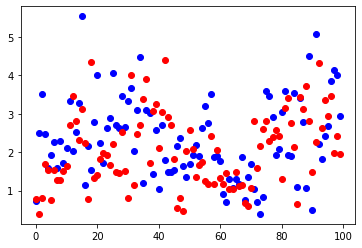

In [9]:
plt.scatter(x=index_class,y=new_data[new_data['Class']==1].f1[:100],color='b')
plt.scatter(x=index_class,y=new_data[new_data['Class']==0].f1[:100],color='r')
plt.show()

In [10]:
liste_data=[]
for i in range(0,252):
    liste_data.append(i)

In [11]:
new_data[new_data.Class==1].head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,Class
0,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,195.252,193.289,14.773,159.515,234.505,170.0,169.0,0.005181,0.000403,1
1,2,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,201.997,203.471,10.853,182.713,220.230,94.0,92.0,0.004910,0.000320,1
2,3,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,211.887,208.440,11.499,182.821,225.162,117.0,114.0,0.004757,0.000380,1
3,4,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,...,195.952,195.222,4.692,186.593,202.812,74.0,73.0,0.005118,0.000187,1
4,5,1.583,0.000082,0.768,0.864,2.303,9.057,1.070,3.794,5.158,...,195.535,192.316,7.512,177.299,200.638,85.0,84.0,0.005199,0.000245,1


In [12]:
new_data[new_data.Class==0].head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,Class
346,355,0.792,0.000076,0.411,0.333,1.234,4.136,0.391,2.202,2.552,...,103.774,103.862,1.730,98.743,110.597,147.0,146.0,0.009623,0.000203,0
347,356,0.400,0.000038,0.204,0.228,0.613,11.598,1.019,5.521,7.922,...,105.271,105.500,1.083,103.224,108.389,105.0,104.0,0.009478,0.000101,0
348,357,0.813,0.000074,0.434,0.437,1.302,17.380,1.473,8.595,10.105,...,108.954,109.202,1.316,107.359,113.089,62.0,56.0,0.009150,0.000123,0
349,358,1.700,0.000172,0.789,0.929,2.367,7.283,0.723,2.640,3.281,...,100.527,98.816,4.838,87.466,106.806,38.0,37.0,0.010109,0.000494,0
350,359,1.528,0.000159,0.596,0.698,1.789,8.213,0.902,2.992,4.054,...,97.658,96.255,6.928,75.054,107.295,41.0,39.0,0.010419,0.000823,0


In [13]:
new_data.iloc[:,1:5].corr()

,f1,f2,f3,f4
f1,1.000000,0.907353,0.948818,0.924888
f2,0.907353,1.000000,0.838732,0.816680
f3,0.948818,0.838732,1.000000,0.939743
f4,0.924888,0.816680,0.939743,1.000000


In [14]:
new_data.isnull().sum()

Unnamed: 0    0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
f12           0
f13           0
f14           0
f15           0
f16           0
f17           0
f18           0
f19           0
f20           0
f21           0
f22           0
f23           0
Class         0
dtype: int64

In [15]:
dataX=new_data.drop('Class',axis=1)
dataY=new_data['Class']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=0)

In [17]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (581, 24)
X_test (146, 24)
y_train (581,)
y_test (146,)


In [18]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=19)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [35]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (581, 19)
X_test (146, 19)
y_train (581, 1)
y_test (146, 1)


In [36]:
X_train=pd.DataFrame(data=X_train,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19'])
X_test=pd.DataFrame(data=X_test,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19'])

In [41]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (581, 19)
X_test (146, 19)
y_train (581, 1)
y_test (146, 1)


In [42]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [39]:
def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [43]:
combine_features_list=[
    ('f1','f2','f3','f4','f5','f6'),
    ('f6','f7','f8','f9','f10','f11'),
    ('f9','f10','f11','f12','f13','f14'),
    ('f15','f16','f17','f18','f19')
]

In [61]:
parameters=[
{
    'penalty':['l1','l2'],
    'C':[0.1,0.4,0.5],
    'random_state':[0]
    
    },
]

for features in combine_features_list:
    print(features)
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
    
    gslog=GridSearchCV(LogisticRegression(),parameters,scoring='accuracy')
    y_train= y_train.ravel()
    gslog.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gslog.best_params_)
    print()
    predictions=[
    (gslog.predict(X_train_set),y_train,'Train'),
    (gslog.predict(X_test_set),y_test,'Test1'),
    ]
    
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1],pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)    
    basari=cross_val_score(estimator=LogisticRegression(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

('f1', 'f2', 'f3', 'f4', 'f5', 'f6')
**************************************************


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

Best parameters set:
{'C': 0.1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       211
           1       0.83      0.90      0.86       370

    accuracy                           0.82       581
   macro avg       0.81      0.79      0.80       581
weighted avg       0.82      0.82      0.82       581

**************************************************
Train Confusion Matrix:
[[144  67]
 [ 38 332]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.83      0.64      0.72        59
           1       0.79      0.91      0.84        87

    accuracy                           0.80       146
   macro avg       0.81      0.78      0.78       146
weighted avg       0.80

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

[[34 25]
 [ 9 78]]
**************************************************
**************************************************
0.8483560090702947
0.05345357106060092
**************************************************
('f9', 'f10', 'f11', 'f12', 'f13', 'f14')
**************************************************
Best parameters set:
{'C': 0.4, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.62      0.15      0.24       211
           1       0.66      0.95      0.78       370

    accuracy                           0.66       581
   macro avg       0.64      0.55      0.51       581
weighted avg       0.64      0.66      0.58       581

**************************************************
Train Confusion Matrix:
[[ 32 179]
 [ 20 350]]
**************************************************
Test1 Classification Report:
******************************************

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

0.8483560090702947
0.05345357106060092
**************************************************
('f15', 'f16', 'f17', 'f18', 'f19')
**************************************************
Best parameters set:
{'C': 0.1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.64      1.00      0.78       370

    accuracy                           0.64       581
   macro avg       0.32      0.50      0.39       581
weighted avg       0.41      0.64      0.50       581

**************************************************
Train Confusion Matrix:
[[  0 211]
 [  0 370]]
**************************************************
Test1 Classification Report:
**************************************************


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.60      1.00      0.75        87

    accuracy                           0.60       146
   macro avg       0.30      0.50      0.37       146
weighted avg       0.36      0.60      0.44       146

**************************************************
Test1 Confusion Matrix:
[[ 0 59]
 [ 0 87]]
**************************************************
**************************************************
0.8483560090702947
0.05345357106060092
**************************************************


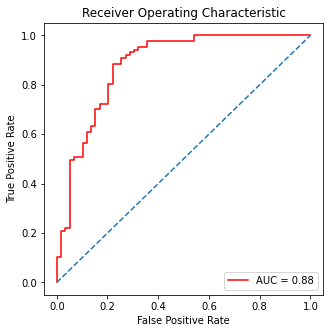

In [62]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=0.1,penalty='l2',random_state=0)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)


y_proba=lr.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        59
           1       0.92      0.98      0.95        87

    accuracy                           0.94       146
   macro avg       0.94      0.93      0.94       146
weighted avg       0.94      0.94      0.94       146

Accurancy Oranı : 0.9383561643835616
Logistic TRAIN score with  0.8605851979345955
Logistic TEST score with  0.8424657534246576

Sensitivity: 0.9770114942528736
Specificity: 0.8813559322033898
[[52  7]
 [ 2 85]]


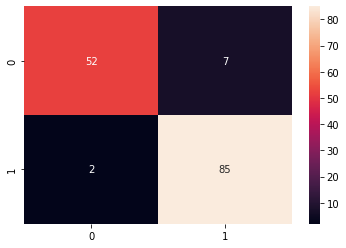

In [76]:
from sklearn.metrics import r2_score,accuracy_score

print(classification_report(y_test, y_pred))
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("Logistic TRAIN score with ",format(lr.score(X_train, y_train)))
print("Logistic TEST score with ",format(lr.score(X_test, y_test)))
print()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()


In [78]:
import numpy as np
parameters=[
{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    },
]
print("*"*50)
for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
   
    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    y_train= y_train.ravel()
    gsknn.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)
    predictions = [
    (gsknn.predict(X_train_set), y_train, 'Train'),
    (gsknn.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=KNeighborsClassifier(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50) 

**************************************************
**************************************************
Best parameters set:
{'n_jobs': 2, 'n_neighbors': 16}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       211
           1       0.89      0.93      0.91       370

    accuracy                           0.88       581
   macro avg       0.88      0.86      0.87       581
weighted avg       0.88      0.88      0.88       581

**************************************************
Train Confusion Matrix:
[[169  42]
 [ 27 343]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        59
           1       0.88      0.92      0.90     

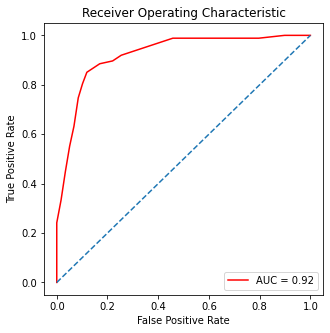

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        59
           1       0.86      0.90      0.88        87

    accuracy                           0.85       146
   macro avg       0.85      0.84      0.84       146
weighted avg       0.85      0.85      0.85       146

Accurancy Oranı : 0.8493150684931506
KNN TRAIN score with  0.8846815834767642
KNN TEST score with  0.8493150684931506

Sensitivity: 0.896551724137931
Specificity: 0.7796610169491526
[[46 13]
 [ 9 78]]


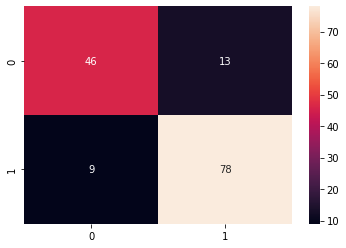

In [79]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=22)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print(classification_report(y_test, y_pred))
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("KNN TRAIN score with ",format(knn.score(X_train, y_train)))
print("KNN TEST score with ",format(knn.score(X_test, y_test)))
print()
# calculate sensitivity and specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

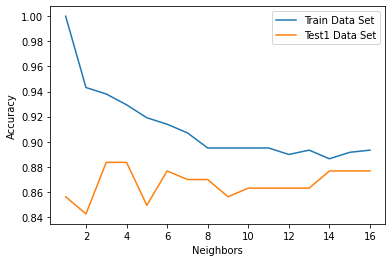

In [66]:
n_neighbors = range(1, 17)
train_data_accuracy = []
test1_data_accuracy = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train, y_train)
    train_data_accuracy.append(knn.score(X_train, y_train))
    test1_data_accuracy.append(knn.score(X_test, y_test))
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test1_data_accuracy, label="Test1 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

In [67]:
n_neighbors = range(1, 17)
k_scores=[]
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    scores=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=12)
    k_scores.append(scores.mean())
print(k_scores)

[0.831420068027211, 0.835034013605442, 0.8314909297052154, 0.8365929705215419, 0.8364866780045354, 0.8415532879818594, 0.8449900793650794, 0.8432539682539683, 0.8587372448979592, 0.8623866213151928, 0.8501629818594104, 0.8555130385487528, 0.8520408163265306, 0.8589498299319728, 0.867594954648526, 0.8537414965986394]


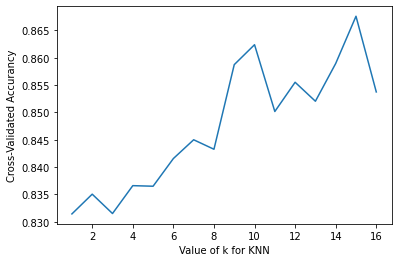

In [68]:
plt.plot(n_neighbors,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel("Cross-Validated Accurancy")
plt.show()

In [69]:
parameters = [
    {
        'kernel': ['linear'],
        'random_state': [2]
    },
    {
        'kernel': ['rbf'],
        'gamma':[0.9,0.06,0.3],
        'random_state': [0],
        'C':[1,2,3,4,5,6],
        'degree':[2],
        'probability':[True]
    },
]

for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
  
    svc = GridSearchCV(SVC(), parameters,
    scoring='accuracy')
    svc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(svc.best_params_)
    print("*"*50)
    predictions = [
    (svc.predict(X_train_set), y_train, 'Train'),
    (svc.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'C': 6, 'degree': 2, 'gamma': 0.06, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       211
           1       0.98      0.99      0.98       370

    accuracy                           0.98       581
   macro avg       0.98      0.97      0.98       581
weighted avg       0.98      0.98      0.98       581

**************************************************
Train Confusion Matrix:
[[203   8]
 [  5 365]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        59
           1       0.92      0.95     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

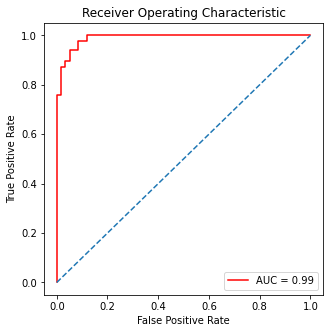

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        59
           1       0.92      0.98      0.95        87

    accuracy                           0.94       146
   macro avg       0.94      0.93      0.94       146
weighted avg       0.94      0.94      0.94       146

Accurancy Oranı : 0.9383561643835616
SVC TRAIN score with  0.9948364888123924
SVC TEST score with  0.9383561643835616

Sensitivity: 0.9770114942528736
Specificity: 0.8813559322033898
[[52  7]
 [ 2 85]]


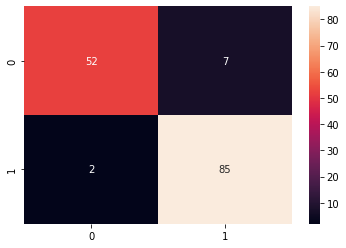

In [75]:
svc=SVC(C=5,degree=2,gamma=0.06,kernel='rbf',probability=True,random_state=0)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

y_proba=svc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print(classification_report(y_test, y_pred))
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("SVC TRAIN score with ",format(svc.score(X_train, y_train)))
print("SVC TEST score with ",format(svc.score(X_test, y_test)))
print()
# calculate sensitivity and specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [71]:
parameters = [
{
    'learning_rate': [0.01, 0.02, 0.002],
    'random_state': [0],
    'n_estimators': np.arange(3, 20)
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
   
    gbc = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='accuracy')
    gbc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(gbc.best_params_)
    print("*"*50)
    predictions = [
    (gbc.predict(X_train_set), y_train, 'Train'),
    (gbc.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=GradientBoostingClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'learning_rate': 0.02, 'n_estimators': 18, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.92      0.54      0.68       211
           1       0.79      0.97      0.87       370

    accuracy                           0.81       581
   macro avg       0.85      0.75      0.77       581
weighted avg       0.83      0.81      0.80       581

**************************************************
Train Confusion Matrix:
[[113  98]
 [ 10 360]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.92      0.41      0.56        59
           1       0.71      0.98      0.82        87

    accuracy  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

0.9121870571563533
0.017960926944363825
**************************************************
**************************************************
Best parameters set:
{'learning_rate': 0.01, 'n_estimators': 3, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.64      1.00      0.78       370

    accuracy                           0.64       581
   macro avg       0.32      0.50      0.39       581
weighted avg       0.41      0.64      0.50       581

**************************************************
Train Confusion Matrix:
[[  0 211]
 [  0 370]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

0.9138993859234765
0.0199387757371748
**************************************************


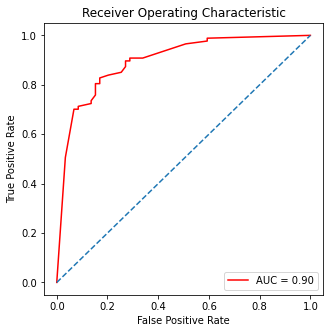

              precision    recall  f1-score   support

           0       0.96      0.41      0.57        59
           1       0.71      0.99      0.83        87

    accuracy                           0.75       146
   macro avg       0.84      0.70      0.70       146
weighted avg       0.81      0.75      0.72       146

Accurancy Oranı : 0.7534246575342466
GradientBoostingClassifier TRAIN score with  0.8158347676419966
GradientBoostingClassifier TEST score with  0.7534246575342466

Sensitivity: 0.9885057471264368
Specificity: 0.4067796610169492
[[24 35]
 [ 1 86]]


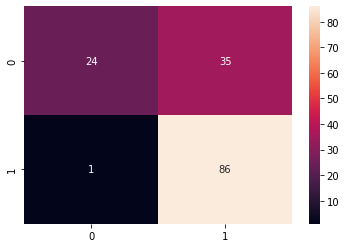

In [74]:
gbc=GradientBoostingClassifier(learning_rate=0.02,n_estimators=18,random_state=0)
gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)

y_proba=gbc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print(classification_report(y_test, y_pred))
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("GradientBoostingClassifier TRAIN score with ",format(gbc.score(X_train, y_train)))
print("GradientBoostingClassifier TEST score with ",format(gbc.score(X_test, y_test)))
print()
# calculate sensitivity and specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

Default Validation Accuracy: 0.8984674329501916
Tuned Validation Accuracy: 0.9087975243147657
Selected Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Final Accuracy: 0.8972602739726028
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        59
           1       0.88      0.97      0.92        87

    accuracy                           0.90       146
   macro avg       0.91      0.88      0.89       146
weighted avg       0.90      0.90      0.90       146


Sensitivity: 0.9655172413793104
Specificity: 0.7966101694915254
[[47 12]
 [ 3 84]]


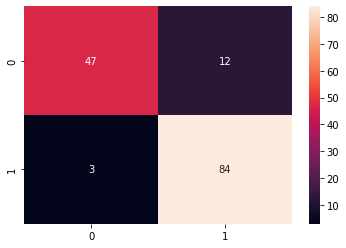

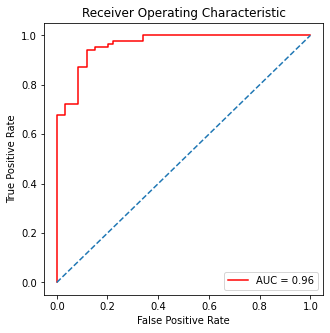

In [80]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score


# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation with the default hyperparameters
default_scores = cross_val_score(rfc, X_train, y_train, cv=5)

# Print the default validation accuracy
print("Default Validation Accuracy:", default_scores.mean())


# Define the hyperparameters to tune
params = {'n_estimators': [100, 200, 300],
          'max_depth': [5, 10, 15],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}

# Create a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rfc, param_grid=params, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the tuned validation accuracy and selected hyperparameters
print("Tuned Validation Accuracy:", grid_search.best_score_)
print("Selected Hyperparameters:", grid_search.best_params_)

# Train the random forest model with the selected hyperparameters
rfc = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rfc.fit(X_train, y_train)
# Calculate the final accuracy on the full dataset
y_pred = rfc.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

# Print the final accuracy
print("Final Accuracy:", final_accuracy)
print(classification_report(y_test, y_pred))



cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

y_pred=rfc.predict(X_test)

y_proba=rfc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)
print()
# calculate sensitivity and specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

SVM:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        59
           1       0.93      0.97      0.95        87

    accuracy                           0.94       146
   macro avg       0.94      0.93      0.94       146
weighted avg       0.94      0.94      0.94       146

Default Accuracy: 0.9452054794520548
Tuned Accuracy: 0.9383561643835616
Selected Hyperparameters: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Confusion Matrix: [[53  6]
 [ 3 84]]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


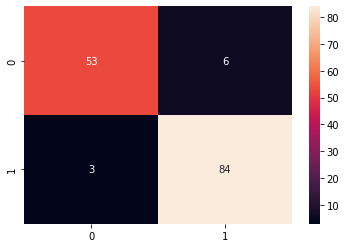

KNN:
              precision    recall  f1-score   support

           0       0.80      0.68      0.73        59
           1       0.80      0.89      0.84        87

    accuracy                           0.80       146
   macro avg       0.80      0.78      0.79       146
weighted avg       0.80      0.80      0.80       146

Default Accuracy: 0.8424657534246576
Tuned Accuracy: 0.8013698630136986
Selected Hyperparameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Confusion Matrix: [[40 19]
 [10 77]]


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


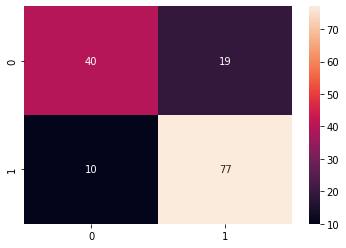

Ensemble:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        59
           1       0.92      0.93      0.93        87

    accuracy                           0.91       146
   macro avg       0.91      0.91      0.91       146
weighted avg       0.91      0.91      0.91       146

Default Accuracy: 0.910958904109589
Final Accuracy: 0.910958904109589
Selected Hyperparameters: {'estimators': [('svm', SVC(C=10, gamma=0.1, probability=True)), ('knn', KNeighborsClassifier(n_neighbors=9, weights='distance'))], 'flatten_transform': True, 'n_jobs': None, 'verbose': False, 'voting': 'soft', 'weights': None, 'svm': SVC(C=10, gamma=0.1, probability=True), 'knn': KNeighborsClassifier(n_neighbors=9, weights='distance'), 'svm__C': 10, 'svm__break_ties': False, 'svm__cache_size': 200, 'svm__class_weight': None, 'svm__coef0': 0.0, 'svm__decision_function_shape': 'ovr', 'svm__degree': 3, 'svm__gamma': 0.1, 'svm__kernel': 'rbf', 'svm__max_iter': -1,

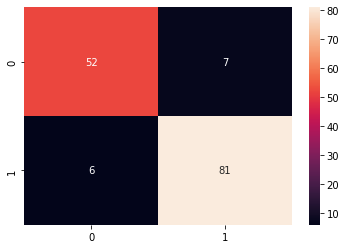

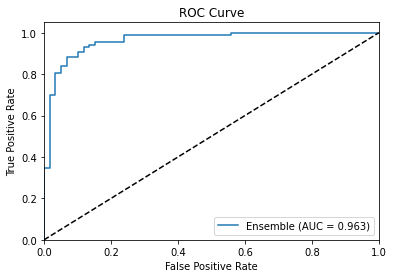

Sensitivity: 0.9310344827586207
Specificity: 0.8813559322033898


In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM with grid search for hyperparameters
svm = SVC(probability=True)
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(svm, param_grid, cv=5)
grid.fit(X_train, y_train)
svm_best = grid.best_estimator_

# KNN with grid search for hyperparameters
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, y_train)
knn_best = grid.best_estimator_

# Combine the models using Voting
ensemble = VotingClassifier(estimators=[('svm', svm_best), ('knn', knn_best)], voting='soft')
ensemble.fit(X_train, y_train)

# Predict on the validation set and evaluate the performance
print('SVM:')
y_pred = svm_best.predict(X_test)
print(classification_report(y_test, y_pred))
svm.fit(X_test,y_test)
print('Default Accuracy:', svm.score(X_test, y_test))
print('Tuned Accuracy:', accuracy_score(y_test, y_pred))
print('Selected Hyperparameters:', svm_best.get_params())
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

print('KNN:')
y_pred = knn_best.predict(X_test)
print(classification_report(y_test, y_pred))
knn.fit(X_test,y_test)

print('Default Accuracy:', knn.score(X_test, y_test))
print('Tuned Accuracy:', accuracy_score(y_test, y_pred))
print('Selected Hyperparameters:', knn_best.get_params())
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

print('Ensemble:')
y_pred = ensemble.predict(X_test)
print(classification_report(y_test, y_pred))
print('Default Accuracy:', ensemble.score(X_test, y_test))
print('Final Accuracy:', accuracy_score(y_test, y_pred))
print('Selected Hyperparameters:', ensemble.get_params())
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

# Plot the ROC curve and calculate AUC
from sklearn.metrics import roc_auc_score
y_test_pred_proba = ensemble.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
auc = roc_auc_score(y_test, y_test_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label="Ensemble (AUC = {:.3f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# calculate sensitivity and specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)





SVM:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        59
           1       0.93      0.97      0.95        87

    accuracy                           0.94       146
   macro avg       0.94      0.93      0.94       146
weighted avg       0.94      0.94      0.94       146

Default Accuracy: 0.9452054794520548
Tuned Accuracy: 0.9383561643835616
Selected Hyperparameters: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Confusion Matrix: [[53  6]
 [ 3 84]]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


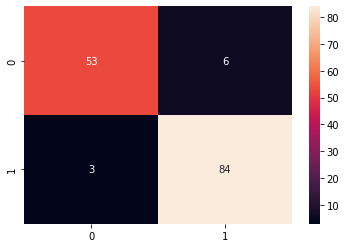

RFC:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        59
           1       0.88      0.97      0.92        87

    accuracy                           0.90       146
   macro avg       0.91      0.88      0.89       146
weighted avg       0.90      0.90      0.90       146



<ipython-input-82-3f9d6c2452c3>:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_test,y_test)


Default Validation Accuracy: 0.8984674329501916
Tuned Validation Accuracy: 0.9087975243147657
Selected Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Confusion Matrix: [[47 12]
 [ 3 84]]


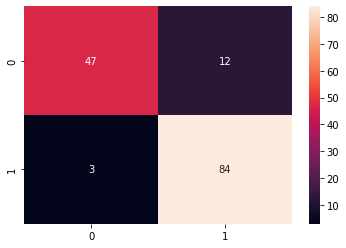

Ensemble:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        59
           1       0.92      0.98      0.95        87

    accuracy                           0.94       146
   macro avg       0.94      0.93      0.94       146
weighted avg       0.94      0.94      0.94       146

Default Accuracy: 0.9383561643835616
Final Accuracy: 0.9383561643835616
Selected Hyperparameters: {'estimators': [('svm', SVC(C=10, gamma=0.1, probability=True)), ('rfc', RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=300,
                       random_state=42))], 'flatten_transform': True, 'n_jobs': None, 'verbose': False, 'voting': 'soft', 'weights': None, 'svm': SVC(C=10, gamma=0.1, probability=True), 'rfc': RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=300,
                       random_state=42), 'svm__C': 10, 'svm__break_ties': False, 'svm__cache_size': 200, 'svm__class_weight': None, 'svm__coef0': 0

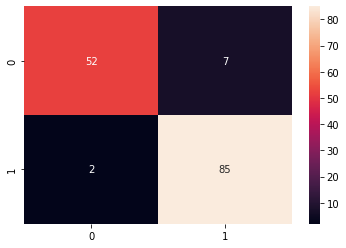

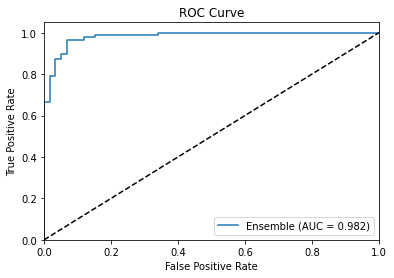

Sensitivity: 0.9770114942528736
Specificity: 0.8813559322033898


In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM with grid search for hyperparameters
svm = SVC(probability=True)
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(svm, param_grid, cv=5)
grid.fit(X_train, y_train)
svm_best = grid.best_estimator_


from sklearn.model_selection import cross_val_score, GridSearchCV



# Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation with the default hyperparameters
default_scores = cross_val_score(rfc, X_train, y_train, cv=5)



# Define the hyperparameters to tune
params = {'n_estimators': [100, 200, 300],
          'max_depth': [5, 10, 15],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}

# Create a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rfc, param_grid=params, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)



# Train the random forest model with the selected hyperparameters
rfc = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rfc.fit(X_train, y_train)
# Calculate the final accuracy on the full dataset
y_pred = rfc.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)




# Combine the models using Voting
ensemble = VotingClassifier(estimators=[('svm', svm_best), ('rfc', rfc)], voting='soft')
ensemble.fit(X_train, y_train)

# Predict on the validation set and evaluate the performance
print('SVM:')
y_pred = svm_best.predict(X_test)
print(classification_report(y_test, y_pred))
svm.fit(X_test,y_test)
print('Default Accuracy:', svm.score(X_test, y_test))
print('Tuned Accuracy:', accuracy_score(y_test, y_pred))
print('Selected Hyperparameters:', svm_best.get_params())
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

print('RFC:')
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
rfc.fit(X_test,y_test)

print("Default Validation Accuracy:", default_scores.mean())
print("Tuned Validation Accuracy:", grid_search.best_score_)
print("Selected Hyperparameters:", grid_search.best_params_)
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

print('Ensemble:')
y_pred = ensemble.predict(X_test)
print(classification_report(y_test, y_pred))
print('Default Accuracy:', ensemble.score(X_test, y_test))
print('Final Accuracy:', accuracy_score(y_test, y_pred))
print('Selected Hyperparameters:', ensemble.get_params())
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

# Plot the ROC curve and calculate AUC
from sklearn.metrics import roc_auc_score
y_test_pred_proba = ensemble.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
auc = roc_auc_score(y_test, y_test_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label="Ensemble (AUC = {:.3f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# calculate sensitivity and specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

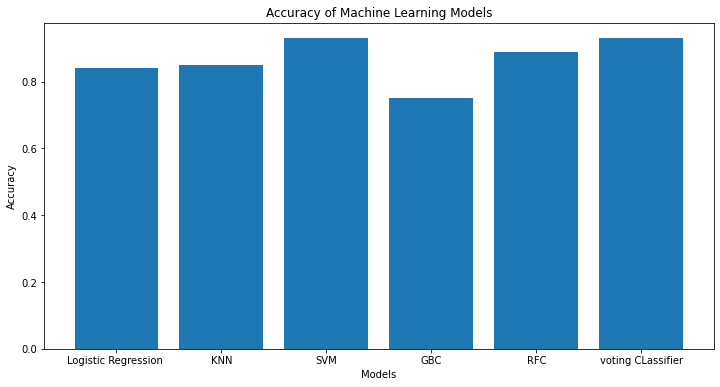

In [83]:
import matplotlib.pyplot as plt

# Define the models and their corresponding accuracies
models = ['Logistic Regression ', 'KNN', 'SVM', 'GBC' ,'RFC' ,'voting CLassifier']
accuracies = [0.842, 0.849, 0.93, 0.75, 0.89, 0.93]

# Create a bar plot
plt.bar(models, accuracies)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Models')

# Enlarge the plot
fig = plt.gcf()
fig.set_size_inches(12, 6)  # Set the size of the figure


# Display the plot
plt.show()